In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression,PLSSVD
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [47]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
pls_model = PLSRegression().fit(x_train,y_train)

In [49]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

# Tahmin

In [50]:
pls_model.predict(x_train)

array([[ 344.91941493],
       [ 848.87070769],
       [ 692.93622642],
       [ 185.56577984],
       [ 435.49196077],
       [ 987.49530026],
       [ 120.63097106],
       [ 289.9263406 ],
       [ 663.41886918],
       [ 817.90486641],
       [1400.82155793],
       [ 889.55177741],
       [ 966.02942625],
       [ 761.83859363],
       [ 817.87219643],
       [ 778.83233464],
       [ 947.29337036],
       [   2.76773968],
       [ -72.48003564],
       [ 382.99117487],
       [ 596.85479706],
       [ 977.61608943],
       [ 415.33783869],
       [ 464.78071379],
       [ -26.62516231],
       [ 722.22493096],
       [ 494.5057314 ],
       [ 242.23751188],
       [ 206.9261497 ],
       [ 232.56490602],
       [  64.4824203 ],
       [ 542.14513157],
       [ 947.14732555],
       [ 194.89583773],
       [ 362.6202354 ],
       [ 295.26950277],
       [ 439.33442044],
       [ 776.65786654],
       [ 317.39738256],
       [ 137.13823539],
       [ 103.25963596],
       [ 206.203

In [51]:
y_pred = pls_model.predict(x_train)

In [52]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [53]:
r2_score(y_train,y_pred)

0.5140424486535482

In [54]:
y_pred2 = y_pred = pls_model.predict(x_test)

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

# Model Tuning

In [56]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
RMSE = []


for i in np.arange(1,x_train.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*model_selection.cross_val_score(pls,
                                                      x_train,
                                                      y_train,
                                                      cv=cv_10,
                                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

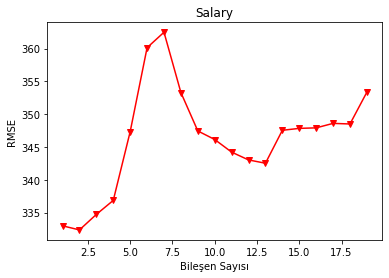

In [57]:
plt.plot(np.arange(1,x_train.shape[1]+1),np.array(RMSE),"-v",c="r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

In [58]:
pls_model = PLSRegression(n_components=2).fit(x_train,y_train)

In [59]:
y_pred = pls_model.predict(x_test)

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526